<a href="https://colab.research.google.com/github/JohnWu777/Colab-python-class/blob/main/MA_HW4(PCA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [351]:
import pandas as pd

# Import the XLSX file
PCA_raw = pd.read_excel('HW4.xlsx')

# Display the first few rows of the data
print(PCA_raw.head())

  Unnamed: 0       P1   P2  P3    P4           V1       V2      S1    S2  \
0        新北市  7946.00  401  17  2475  1,090,199\t  2266915  491.79  11.9   
1        台北市  5036.80  293  15  3454       836911   940809  667.17  12.0   
2        桃園市  5412.95  262   9   786       873994  1354308  597.82  13.5   
3        台中市  9178.08  258  19  1441      1176373  1845459  617.23  16.3   
4        台南市  3569.90  157   6   487       739734  1373373  577.19  20.9   

      A1   A2     A3       L1       L2  
0  46199  264  62802  2326343  2425279  
1  23921  109  32072  1624410  1296281  
2  47973  248  62900  1435004  1466153  
3  72279  315  96208  1931303  2007564  
4  44775  296  60313  1203339  1343772  


In [352]:
# Choose variables from PCA_raw

PCA = PCA_raw.iloc[:,[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]].copy()

# Display the structure (info) of PCA
print(PCA.dtypes)
print("\n")
print(PCA.head())

P1    float64
P2      int64
P3      int64
P4      int64
V1     object
V2      int64
S1    float64
S2    float64
A1      int64
A2      int64
A3     object
L1      int64
L2     object
dtype: object


        P1   P2  P3    P4           V1       V2      S1    S2     A1   A2  \
0  7946.00  401  17  2475  1,090,199\t  2266915  491.79  11.9  46199  264   
1  5036.80  293  15  3454       836911   940809  667.17  12.0  23921  109   
2  5412.95  262   9   786       873994  1354308  597.82  13.5  47973  248   
3  9178.08  258  19  1441      1176373  1845459  617.23  16.3  72279  315   
4  3569.90  157   6   487       739734  1373373  577.19  20.9  44775  296   

      A3       L1       L2  
0  62802  2326343  2425279  
1  32072  1624410  1296281  
2  62900  1435004  1466153  
3  96208  1931303  2007564  
4  60313  1203339  1343772  


In [353]:
import pandas as pd

# 假设你的 DataFrame 是 PCA
# 清理列中的逗号和制表符，转换为数值类型

# 清除包含逗号（用于千位分隔符）和制表符（\t）
PCA_cleaned = PCA.replace({',': '', '\t': ''}, regex=True)

# 将所有列转换为数值类型
PCA_cleaned = PCA_cleaned.apply(pd.to_numeric, errors='coerce')

PCA = PCA_cleaned.copy()

In [354]:
# Check descriptive statistics (describe用於快速了解數據特徵)
print(PCA.describe())

                P1          P2         P3           P4            V1  \
count    22.000000   22.000000  22.000000    22.000000  2.200000e+01   
mean   2382.248182   96.500000   7.818182   484.272727  3.904878e+05   
std    2797.106347  115.654144   6.138375   896.672005  3.733933e+05   
min      36.200000    1.000000   1.000000    13.000000  4.221000e+03   
25%     419.610000   21.250000   2.250000    38.250000  1.103288e+05   
50%     920.250000   35.500000   6.500000    70.000000  2.288365e+05   
75%    4553.622500  147.250000  13.000000   405.000000  6.859650e+05   
max    9178.080000  401.000000  19.000000  3454.000000  1.176373e+06   

                 V2          S1         S2            A1          A2  \
count  2.200000e+01   22.000000  22.000000     22.000000   22.000000   
mean   6.611517e+05  565.603636  15.209091  18053.818182  133.136364   
std    6.878068e+05   64.514907   4.482974  19456.441464  104.801988   
min    8.155000e+03  444.400000   6.700000     57.000000    0.0

In [355]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr

# 计算相关矩阵
correlation_matrix = PCA.corr()

# 显示相关矩阵
print("correlation_matrix:\n", correlation_matrix)

# Compute the p-values matrix
p_values_matrix = np.zeros((PCA.shape[1], PCA.shape[1]))
for i in range(PCA.shape[1]):
    for j in range(PCA.shape[1]):
        _, p_value = pearsonr(PCA.iloc[:, i], PCA.iloc[:, j])
        p_values_matrix[i, j] = p_value

print("P-values Matrix:\n")
pd.DataFrame(p_values_matrix, columns=PCA.columns, index=PCA.columns)

correlation_matrix:
           P1        P2        P3        P4        V1        V2        S1  \
P1  1.000000  0.930764  0.756262  0.731887  0.907742  0.899209  0.346808   
P2  0.930764  1.000000  0.661502  0.871199  0.901235  0.880241  0.285295   
P3  0.756262  0.661502  1.000000  0.559496  0.574550  0.542803  0.248344   
P4  0.731887  0.871199  0.559496  1.000000  0.752505  0.661656  0.319884   
V1  0.907742  0.901235  0.574550  0.752505  1.000000  0.964266  0.271283   
V2  0.899209  0.880241  0.542803  0.661656  0.964266  1.000000  0.245510   
S1  0.346808  0.285295  0.248344  0.319884  0.271283  0.245510  1.000000   
S2  0.022826 -0.076506 -0.214168 -0.150993  0.178091  0.209970  0.050849   
A1  0.886183  0.812166  0.555211  0.579263  0.948774  0.912076  0.223202   
A2  0.788419  0.684450  0.537954  0.408035  0.873701  0.895396  0.146460   
A3  0.893476  0.818955  0.558165  0.584888  0.952689  0.921166  0.233051   
L1  0.913597  0.941905  0.586705  0.814962  0.987368  0.967700  0.2

,P1,P2,P3,P4,V1,V2,S1,S2,A1,A2,A3,L1,L2
P1,0.000000e+00,3.425748e-10,4.663148e-05,1.081752e-04,5.484860e-09,1.280849e-08,0.113820,0.919690,4.084464e-08,1.310288e-05,2.173341e-08,2.918763e-09,3.237066e-09
P2,3.425748e-10,0.000000e+00,8.005556e-04,1.318819e-07,1.054653e-08,6.622902e-08,0.198098,0.735064,4.429777e-06,4.422717e-04,3.159145e-06,6.210855e-11,2.014621e-09
P3,4.663148e-05,8.005556e-04,5.256551e-155,6.781353e-03,5.162358e-03,9.046800e-03,0.265102,0.338533,7.312274e-03,9.810500e-03,6.942733e-03,4.102642e-03,5.756764e-03
P4,1.081752e-04,1.318819e-07,6.781353e-03,5.256551e-155,5.341488e-05,7.975014e-04,0.146707,0.502385,4.727257e-03,5.941121e-02,4.248387e-03,3.860498e-06,8.398779e-05
V1,5.484860e-09,1.054653e-08,5.162358e-03,5.341488e-05,0.000000e+00,5.286260e-13,0.222003,0.427819,1.816338e-11,1.095748e-07,8.336623e-12,1.772837e-17,1.604824e-16
V2,1.280849e-08,6.622902e-08,9.046800e-03,7.975014e-04,5.286260e-13,0.000000e+00,0.270770,0.348311,3.452986e-09,1.826863e-08,1.204977e-09,1.952325e-13,4.635637e-19
S1,1.138200e-01,1.980980e-01,2.651018e-01,1.467066e-01,2.220033e-01,2.707703e-01,0.000000,0.822193,3.180516e-01,5.154451e-01,2.965976e-01,2.389688e-01,2.830211e-01
S2,9.196898e-01,7.350640e-01,3.385335e-01,5.023853e-01,4.278187e-01,3.483109e-01,0.822193,0.000000,3.703169e-01,8.122489e-02,3.649974e-01,6.111148e-01,4.773350e-01
A1,4.084464e-08,4.429777e-06,7.312274e-03,4.727257e-03,1.816338e-11,3.452986e-09,0.318052,0.370317,0.000000e+00,3.934670e-08,3.595288e-32,6.997111e-09,1.105309e-09
A2,1.310288e-05,4.422717e-04,9.810500e-03,5.941121e-02,1.095748e-07,1.826863e-08,0.515445,0.081225,3.934670e-08,0.000000e+00,2.682391e-08,2.565808e-06,1.787681e-07


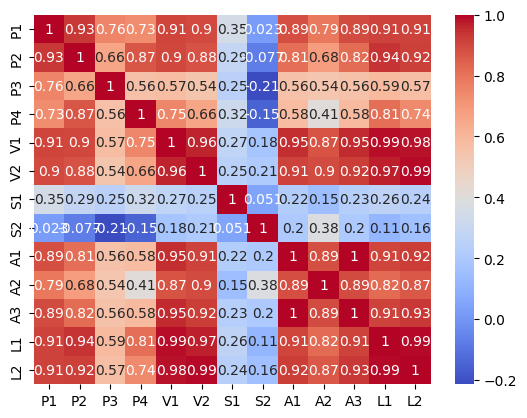

In [356]:
import seaborn as sns
import matplotlib.pyplot as plt

# 计算相关矩阵
correlation_matrix = PCA.corr()

# 绘制热力图查看相关性
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [340]:
%pip install factor_analyzer

In [341]:
from factor_analyzer.factor_analyzer import calculate_kmo
from scipy.stats import bartlett

# Compute the KMO measure
kmo_all, kmo_model = calculate_kmo(PCA)
print("Overall KMO:", kmo_model)
print("KMO for each item:\n", kmo_all)
print("\n")

import pandas as pd

# 确保 PCA 仍然是 DataFrame 类型
PCA = pd.DataFrame(PCA)

# 计算 Bartlett's Test
from scipy.stats import bartlett

# Bartlett's Test 需要每列数据作为独立的参数
bartlett_test = bartlett(*[PCA.iloc[:, i] for i in range(PCA.shape[1])])

print("Bartlett's test statistic:", bartlett_test.statistic)
print("Bartlett's test p-value:", bartlett_test.pvalue)

Overall KMO: 0.7384615539203444
KMO for each item:
 [0.80497715 0.75446773 0.65396432 0.65971929 0.71001557 0.82616772
 0.39350595 0.36773965 0.77283222 0.7225107  0.77711486 0.71344375
 0.79426172]


Bartlett's test statistic: 2526.592330221082
Bartlett's test p-value: 0.0


In [342]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA as sklearnPCA

# Standardize the data
scaler = StandardScaler()
PCA_scaled = scaler.fit_transform(PCA)

# Perform PCA on scaled data
pca_13fac_scaled = sklearnPCA(n_components=13)
pca_13fac_scaled.fit_transform(PCA_scaled)

# Eigenvalues / SS loadings
eigenvalues_13fac = pca_13fac_scaled.explained_variance_
print("Eigenvalues:", eigenvalues_13fac,round(3))
print("\n")

# Compute weighted loadings/ standardized loadings
loadings_13fac = pca_6fac_scaled.components_.T* np.sqrt(pca_13fac_scaled.explained_variance_)

# Create a DataFrame for weighted loadings/ standardized loadings
loadings_13fac_df = pd.DataFrame(loadings_13fac, columns=["PC1", "PC2", "PC3", "PC4", "PC5", "PC6","PC7","PC8","PC9","PC10","PC11","PC12","PC13"], index=PCA.columns)
print("standardized loadings:\n", loadings_13fac_df.round(3),"\n")

Eigenvalues: [9.76463375e+00 1.55219026e+00 9.82001864e-01 6.15668546e-01
 3.91183494e-01 1.47227906e-01 9.96934430e-02 3.88363380e-02
 2.14478522e-02 5.48813863e-03 5.68486787e-04 6.90978870e-05
 3.84356782e-05] 3


standardized loadings:
       PC1    PC2    PC3    PC4    PC5    PC6    PC7    PC8    PC9   PC10  \
P1  0.981 -0.137  0.022  0.127  0.022  0.035  0.195  0.028  0.097  0.007   
P2  0.957 -0.253 -0.045 -0.155  0.061 -0.026  0.146  0.079 -0.095  0.007   
P3  0.685 -0.426 -0.058  0.541  0.309  0.011 -0.046 -0.048 -0.025  0.002   
P4  0.779 -0.435  0.057 -0.397  0.263  0.080 -0.107  0.032  0.035 -0.026   
V1  1.010  0.079 -0.017 -0.092 -0.037  0.020 -0.091 -0.004  0.013  0.057   
V2  0.990  0.142 -0.034 -0.057 -0.063 -0.176  0.043 -0.079  0.002 -0.024   
S1  0.316 -0.233  0.931  0.075 -0.138 -0.028 -0.021  0.003 -0.008 -0.001   
S2  0.131  0.897  0.297 -0.048  0.361  0.059  0.046 -0.013 -0.010  0.001   
A1  0.966  0.179 -0.061  0.084 -0.183  0.195 -0.021 -0.007 -0.020 -0.010   

如果數值相同、只有正負相反，這並不影響解釋，因為主成分的符號是可以翻轉的。可以直接忽略符號差異，繼續分析數據。

In [343]:
import numpy as np
#Step1: Calculate communalities(sum of squared loadings for each variable across all principal components)
communalities_13fac = np.sum(loadings_13fac_df**2, axis=1)

#Step2: Calculate uniqueness (1-communality for each variable)
uniqueness_13fac = 1 - communalities_13fac

#Step3: Combine communalities and uniqueness into the loadings dataframe
loadings_13fac_df['Communalities'] = communalities_13fac
loadings_13fac_df['Uniqueness'] = uniqueness_13fac

# Output the updata loadings dataframe
print(loadings_13fac_df.round(3))

      PC1    PC2    PC3    PC4    PC5    PC6    PC7    PC8    PC9   PC10  \
P1  0.981 -0.137  0.022  0.127  0.022  0.035  0.195  0.028  0.097  0.007   
P2  0.957 -0.253 -0.045 -0.155  0.061 -0.026  0.146  0.079 -0.095  0.007   
P3  0.685 -0.426 -0.058  0.541  0.309  0.011 -0.046 -0.048 -0.025  0.002   
P4  0.779 -0.435  0.057 -0.397  0.263  0.080 -0.107  0.032  0.035 -0.026   
V1  1.010  0.079 -0.017 -0.092 -0.037  0.020 -0.091 -0.004  0.013  0.057   
V2  0.990  0.142 -0.034 -0.057 -0.063 -0.176  0.043 -0.079  0.002 -0.024   
S1  0.316 -0.233  0.931  0.075 -0.138 -0.028 -0.021  0.003 -0.008 -0.001   
S2  0.131  0.897  0.297 -0.048  0.361  0.059  0.046 -0.013 -0.010  0.001   
A1  0.966  0.179 -0.061  0.084 -0.183  0.195 -0.021 -0.007 -0.020 -0.010   
A2  0.890  0.381 -0.073  0.232 -0.032 -0.152 -0.109  0.126  0.015 -0.012   
A3  0.971  0.177 -0.052  0.081 -0.179  0.175 -0.012 -0.010 -0.012 -0.018   
L1  1.007 -0.010 -0.037 -0.163  0.012 -0.047 -0.039 -0.040 -0.002  0.017   
L2  1.006  0

In [344]:
# Proportional variance (explained variance ratio for each principal component)
proportional_variance_13fac = pca_13fac_scaled.explained_variance_ratio_

# Cumulative variance (cumulative sum of explained variance ratios)
cumulative_variance_13fac = np.cumsum(proportional_variance_13fac)

# Create a DataFrame where PC1-PC13 are rows with columns for proportional and cumulative variance
variance_df = pd.DataFrame({
    'Proportional Variance': proportional_variance_13fac,
    'Cumulative Variance': cumulative_variance_13fac
}, index=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13'])

# Print the DataFrame rounded to 3 decimal places
print(variance_df.round(3))

      Proportional Variance  Cumulative Variance
PC1                   0.717                0.717
PC2                   0.114                0.831
PC3                   0.072                0.903
PC4                   0.045                0.948
PC5                   0.029                0.977
PC6                   0.011                0.988
PC7                   0.007                0.995
PC8                   0.003                0.998
PC9                   0.002                1.000
PC10                  0.000                1.000
PC11                  0.000                1.000
PC12                  0.000                1.000
PC13                  0.000                1.000


In [345]:
# Perform PCA on sclaed data
pca_2fac_scaled = sklearnPCA(n_components=2)
pca_2fac_scaled.fit_transform(PCA_scaled)

# Eigenvalues / SS loadings
eigenvalues_2fac = pca_2fac_scaled.explained_variance_
print("Eigenvalues:", eigenvalues_2fac)

# Compute weighted loadings/ standardized loadings
loadings_2fac = pca_2fac_scaled.components_.T* np.sqrt(pca_2fac_scaled.explained_variance_)

# Create a DataFrame for weighted loadings / standardized loadings
loadings_2fac_df = pd.DataFrame(loadings_2fac.round(3), columns=["PC1", "PC2"], index=PCA.columns)
print("standardized loadings: \n", loadings_2fac_df, "\n")

# Calculate communalities (sum of squared loadings for each variable across all principal components)
communalities_2fac = np.sum(loadings_2fac_df**2, axis=1)

# Calculate uniqueness (1-communality for each variable)
uniqueness_2fac = 1 - communalities_13fac

# Combine communalities and uniqueness into the loadings dataframe
loadings_2fac_df['Communalities'] = communalities_2fac
loadings_2fac_df['Uniqueness'] = uniqueness_2fac

# Output the updated loadings dataframe
print(loadings_2fac_df.round(3))

Eigenvalues: [9.76463375 1.55219026]
standardized loadings: 
       PC1    PC2
P1  0.981 -0.137
P2  0.957 -0.253
P3  0.685 -0.426
P4  0.779 -0.435
V1  1.010  0.079
V2  0.990  0.142
S1  0.316 -0.233
S2  0.131  0.897
A1  0.966  0.179
A2  0.890  0.381
A3  0.971  0.177
L1  1.007 -0.010
L2  1.006  0.070 

      PC1    PC2  Communalities  Uniqueness
P1  0.981 -0.137          0.981      -0.048
P2  0.957 -0.253          0.980      -0.048
P3  0.685 -0.426          0.651      -0.048
P4  0.779 -0.435          0.796      -0.048
V1  1.010  0.079          1.026      -0.048
V2  0.990  0.142          1.000      -0.048
S1  0.316 -0.233          0.154      -0.048
S2  0.131  0.897          0.822      -0.048
A1  0.966  0.179          0.965      -0.048
A2  0.890  0.381          0.937      -0.048
A3  0.971  0.177          0.974      -0.048
L1  1.007 -0.010          1.014      -0.048
L2  1.006  0.070          1.017      -0.048


In [346]:
# Proportional variance
proportional_variance_2fac = pca_2fac_scaled.explained_variance_ratio_

# Cumulative variance
cumulative_variance_2fac = np.cumsum(proportional_variance_2fac)

# Create a DataFrame
variance_df_2fac = pd.DataFrame({
    'Proportional Variance': proportional_variance_2fac,
    'Cumulative Variance': cumulative_variance_2fac
}, index=['PC1', 'PC2'])

# Print the DataFrame
print(variance_df_2fac.round(3))

     Proportional Variance  Cumulative Variance
PC1                  0.717                0.717
PC2                  0.114                0.831


In [347]:
# Standardized wieghts (principal component loadings)
loadings_scaled_2fac = pca_2fac_scaled.components_
print("Standardized weights:\n", PCA.columns, "\n", loadings_scaled_2fac.round(3))

Standardized weights:
 Index(['P1', 'P2', 'P3', 'P4', 'V1', 'V2', 'S1', 'S2', 'A1', 'A2', 'A3', 'L1',
       'L2'],
      dtype='object') 
 [[ 0.314  0.306  0.219  0.249  0.323  0.317  0.101  0.042  0.309  0.285
   0.311  0.322  0.322]
 [-0.11  -0.203 -0.342 -0.35   0.064  0.114 -0.187  0.72   0.144  0.305
   0.142 -0.008  0.056]]


[ 0.314  0.306  0.219  0.249  0.323  0.317  0.101  0.042  0.309  0.285
   0.311  0.322  0.322] PC1係數

 [-0.11  -0.203 -0.342 -0.35   0.064  0.114 -0.187  0.72   0.144  0.305
   0.142 -0.008  0.056]PC2係數

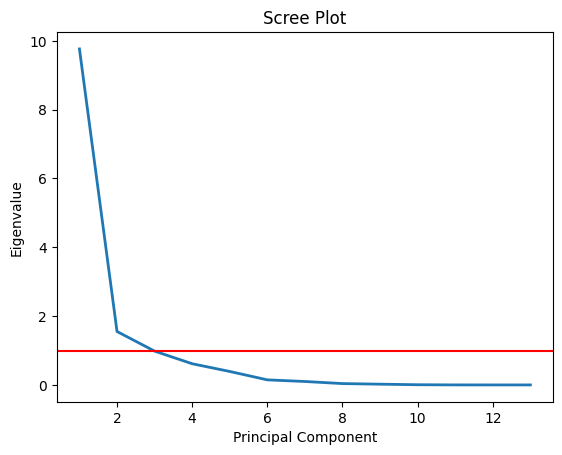

In [348]:
import matplotlib.pyplot as plt

# Plot Scree Plot
plt.plot(range(1, 14), pca_13fac_scaled.explained_variance_, linewidth=2)
plt.axhline(y=1, color='r', linestyle='-')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.show()

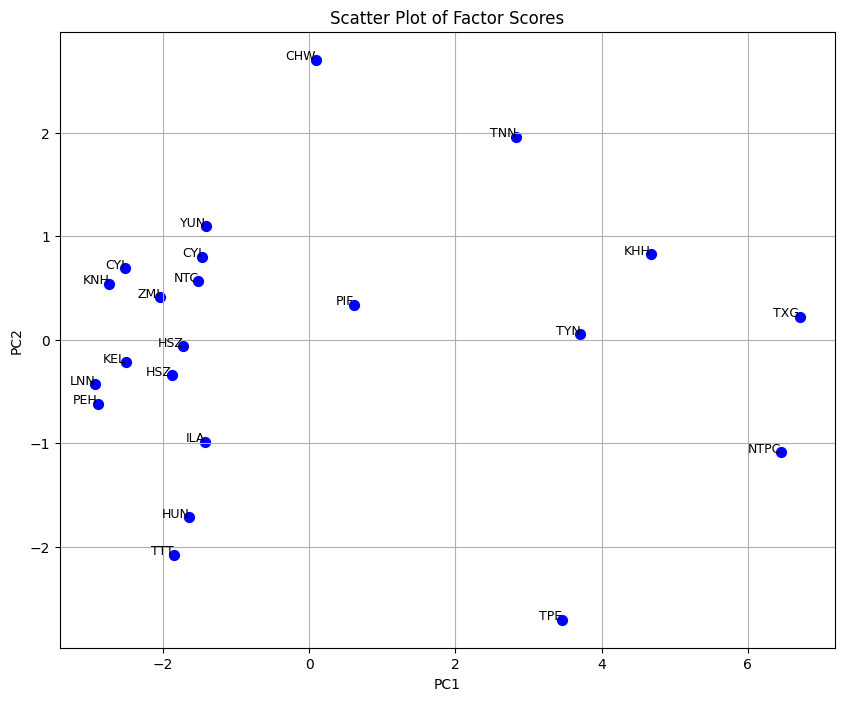

In [349]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# 假設您已經執行 PCA 並生成因子分數 (factor scores)
# 替換 pca_2fac_scaled 和 PCA_scaled 為您的資料名稱
factor_scores = pca_2fac_scaled.fit_transform(PCA_scaled)

# 建立對應的中文地區名稱與英文代號
regions = [
    "新北市", "台北市", "桃園市", "台中市", "台南市", "高雄市",
    "宜蘭縣", "新竹縣", "苗栗縣", "彰化縣", "南投縣", "雲林縣",
    "嘉義縣", "屏東縣", "臺東縣", "花蓮縣", "澎湖縣", "基隆市",
    "新竹市", "嘉義市", "金門縣", "連江縣"
]
regions_en = [
    "NTPC", "TPE", "TYN", "TXG", "TNN", "KHH",
    "ILA", "HSZ", "ZMI", "CHW", "NTC", "YUN",
    "CYI", "PIF", "TTT", "HUN", "PEH", "KEL",
    "HSZ", "CYI", "KNH", "LNN"
]

# 創建一個包含因子分數的 DataFrame
factor_scores_df = pd.DataFrame(factor_scores, columns=['PC1', 'PC2'])

# 畫出散點圖
plt.figure(figsize=(10, 8))
plt.scatter(factor_scores_df['PC1'], factor_scores_df['PC2'], color='blue', s=50)

# 在每個點上標註地區名稱的英文代號
for i in range(len(factor_scores_df)):
    plt.text(
        factor_scores_df['PC1'][i],
        factor_scores_df['PC2'][i],
        regions_en[i],  # 使用英文地區代號標註
        fontsize=9, ha='right'
    )

# 添加圖表標題和軸標籤
plt.title('Scatter Plot of Factor Scores')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)

# 顯示圖表
plt.show()


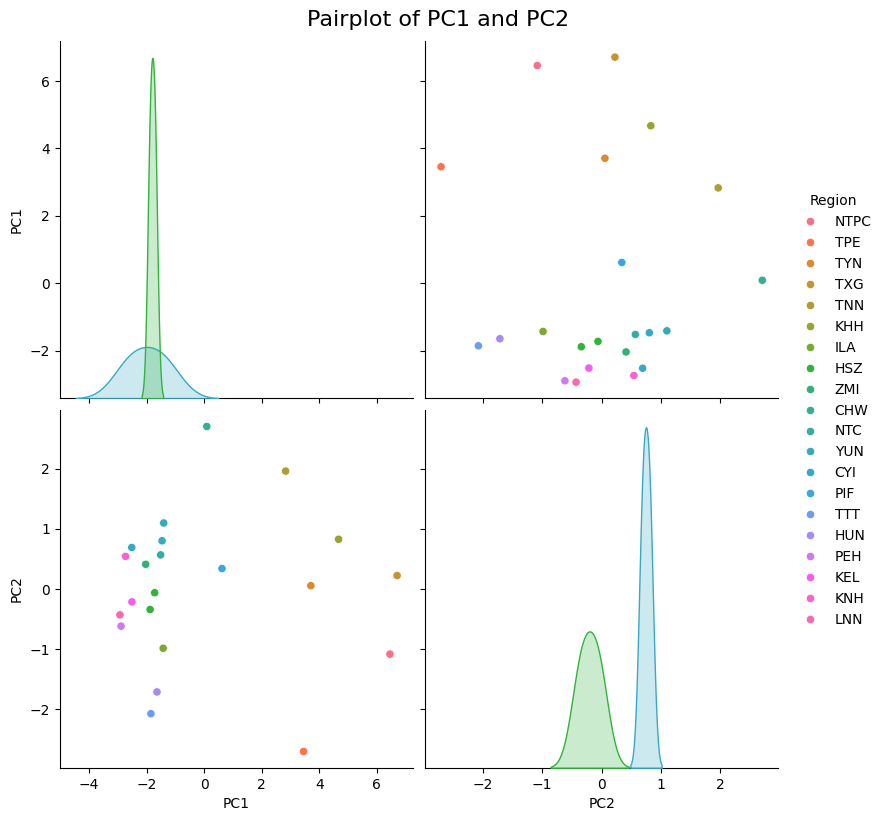

In [350]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# 假設您已經執行 PCA 並生成因子分數 (factor scores)
# 替換 pca_2fac_scaled 和 PCA_scaled 為您的資料名稱
factor_scores = pca_2fac_scaled.fit_transform(PCA_scaled)

# 建立對應的地區名稱（英文代號）
regions_en = [
    "NTPC", "TPE", "TYN", "TXG", "TNN", "KHH",
    "ILA", "HSZ", "ZMI", "CHW", "NTC", "YUN",
    "CYI", "PIF", "TTT", "HUN", "PEH", "KEL",
    "HSZ", "CYI", "KNH", "LNN"
]

# 創建 DataFrame
factor_scores_df = pd.DataFrame(factor_scores, columns=['PC1', 'PC2'])
factor_scores_df['Region'] = regions_en  # 添加地區代號

# 使用 seaborn 繪製 pairplot
sns.pairplot(factor_scores_df, vars=['PC1', 'PC2'], hue='Region', diag_kind='kde', height=4)

# 顯示圖表
plt.suptitle('Pairplot of PC1 and PC2', y=1.02, fontsize=16)
plt.show()
